# Example 01

This script provides an example of fitting of a relaxation experiment.
First import the packages.

In [1]:
using RHEOSafm
using RHEOS

using Plots

Next, the output file provided by the JPK software is imported. The file contains the time-force-displacement values and they are automatically converted into time-stress-strain.
The function `importJPK` requires the file path, the radious of the indenter, and the segments of the curve to upload (i.g. extend, pause, retract).

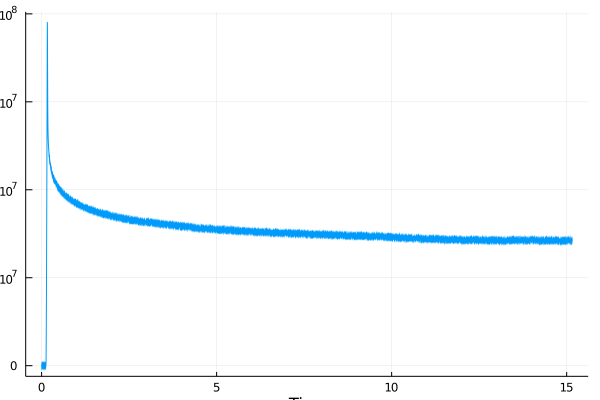

In [2]:
input_file = joinpath(@__DIR__, "assets", "AFM_relaxation.txt")
R = 150e-9; # Radious of the indenter
interface = AFM(R);
data = importJPK(input_file, interface, sections = ["extend", "pause"]);


plot(data.t, data.σ, legend = false, xlabel = "Time", ylabel = "Stress")

To detect the point at which approximately contact occurs in RHEOSafm it is possible to:
1) apply a force threshold
2) apply Hertz spherical contact model
In this example the "threshold" method is used. An application of the Hertz method is availabel in example 02.

In [3]:
data_contact = contact_point(data, interface, "threshold", (threshold = 1e-8,));
d_downsample = resample(data_contact, -10)

plot(data_contact.t, data_contact.σ, legend = false, xlabel = "Time", ylabel = "Stress")


SLS_model = modelstepfit(d_downsample, FractSLS_Zener, strain_imposed)
SLS_predict = extract(data_contact, strain_only)

┌ Warning: Initial values for model parameters are set to [0.5, 0.5, 0.5, 0.5] by default
└ @ RHEOS /home/runner/.julia/packages/RHEOS/UUrax/src/processing.jl:250
Time: 189.196524735 s, Why: FORCED_STOP, Parameters: [4.622140414050802e8, 0.036655107217547764, 2.716750828117413e7, -2.4893703844284803e7], Error: 5.683339986014589e16

and calculate the stress based on the model

In [4]:
SLS_predict = modelpredict(SLS_predict, SLS_model)

Now we can plot data and model together for comparison

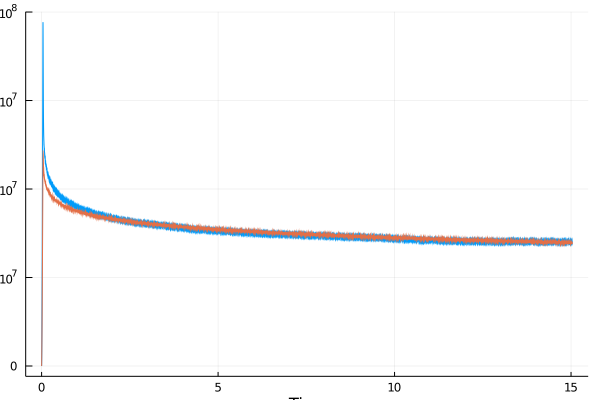

In [5]:
plot(data_contact.t, data_contact.σ, legend = false, xlabel = "Time", ylabel = "Stress")
plot!(SLS_predict.t, SLS_predict.σ, legend = false, xlabel = "Time", ylabel = "Stress")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*